In [1]:
print("Loading Libraries...")
import os, sys
import platform
import pandas as pd
import dask as dd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool
import time
print("Loaded Libraries...")

Loading Libraries...
Loaded Libraries...


In [ ]:
'''#Local
print("Loading directories..")
path_coords = 'D:/01_DOKTORAT/15_results/coords'
path_fft = 'D:/01_DOKTORAT/15_results/fft'
path_mag = 'D:/01_DOKTORAT/15_results/mag'
path_plots = 'D:/01_DOKTORAT/15_results/plots'
print("Loaded directories...")'''

In [2]:
#enterprise
print("Loading directories..")
path_coords = '/media/picard/data/anaconda/JJs_PHD/15_results/coords'
path_fft = '/media/picard/data/jedrzej/anaconda/15_results/fft'
path_mag = '/media/picard/data/anaconda/JJs_PHD/15_results/mag'
path_phase = '/media/picard/data/anaconda/JJs_PHD/15_results/phase'
path_plots = '/media/picard/data/anaconda/JJs_PHD/15_results/plots'
print("Loaded directories...")

Loading directories..
Loaded directories...


In [3]:
#orig_files = sorted(os.listdir(path_fft))
coordlist = sorted(os.listdir(path_coords))
maglist = sorted(os.listdir(path_mag))
phaselist = sorted(os.listdir(path_phase))

In [ ]:
'''def fourier2mp(file):
    os.chdir(path_fft)
    print(str(file) + ' in processing')
    data = pd.read_csv(file).set_index('nodenumber')
    data = data.applymap(complex)
    mag = data.applymap(lambda x: 2*np.sqrt(x.real**2 + x.imag**2)/5015)
    os.chdir(path_mag)
    mag.to_csv('mag_' + str(file))
    del mag
    phase = data.applymap(lambda x: np.arctan(x.imag/x.real))
    os.chdir(path_phase)
    phase.to_csv('phase_' + str(file))
    del phase
    del data
    return()'''

In [ ]:
'''start = time.time()
with Pool(18) as p:
    print(p.map(fourier2mp, orig_files))
print("Time taken = {0:.5f}".format(time.time() - start))'''

In [4]:
N = 5015
F = 100000.0
f_step = F/N
f_bin = np.arange(0.0, F, f_step)

In [5]:
def round_down(num, divisor):
    return num - (num%divisor)

In [ ]:
def df_magrange(file):
    os.chdir(path_mag)
    mag = pd.read_csv(file).set_index('nodenumber')
    mag.columns = np.round(f_bin, decimals=2)
    mag = mag.rename_axis("frequency", axis=1)
    mag = mag.iloc[:,0:1254]
    mag.to_csv('plt_' + str(file))
    del mag
    return()

In [ ]:
with Pool(18) as p:
    p.map(df_magrange, maglist)

In [6]:
maglist = sorted(os.listdir(path_mag))
maglist = maglist[18:]
maglist

['plt_mag_int-01-fft.csv',
 'plt_mag_int-02-fft.csv',
 'plt_mag_int-03-fft.csv',
 'plt_mag_int-04-fft.csv',
 'plt_mag_int-05-fft.csv',
 'plt_mag_int-06-fft.csv',
 'plt_mag_int-07-fft.csv',
 'plt_mag_int-08-fft.csv',
 'plt_mag_int-09-fft.csv',
 'plt_mag_int-10-fft.csv',
 'plt_mag_int-11-fft.csv',
 'plt_mag_int-12-fft.csv',
 'plt_mag_int-tip-fft.csv',
 'plt_mag_lead-fft.csv',
 'plt_mag_pside-fft.csv',
 'plt_mag_sside-fft.csv',
 'plt_mag_tip-fft.csv',
 'plt_mag_trail-fft.csv']

In [ ]:
'''def df_phaserange(file):
    os.chdir(path_phase)
    phase = pd.read_csv(file).set_index('nodenumber')
    phase.columns = np.round(f_bin, decimals=2)
    phase = phase.rename_axis("frequency", axis=1)
    phase = phase.iloc[:,0:1254]
    phase.to_csv('plt_' + str(file))
    del phase
    return()'''

In [ ]:
'''with Pool(18) as p:
    p.map(df_phaserange, phaselist)'''

In [ ]:
'''phaselist = sorted(os.listdir(path_phase))
phaselist = phaselist[18:]'''

In [30]:
def spectrum_extrema(file):
    os.chdir(path_mag)
    mag = pd.read_csv(file).set_index('nodenumber')
    ext = [mag.max().max(), mag.min().min()]
    del mag
    return ext

In [31]:
#start = time.time()
with Pool(18) as p:
    spectrum_ext = p.map(spectrum_extrema, maglist)
#print("Time taken = {0:.5f}".format(time.time() - start))

In [32]:
gmax = 0
gmin = 100000000
for i in spectrum_ext:
    imax = max(i)
    imin = min(i)
    if imax > gmax:
        gmax = imax
    if imin < gmin:
        gmin = imin

In [33]:
x = 20*np.log10(gmin/gmax)
spec_min = round_down(x,5)

In [ ]:
x

In [45]:
def spectrum_plotter(file):
    os.chdir(path_mag)
    location = str(os.path.basename(str(file)))[8:-8]
    mag = pd.read_csv(file).set_index('nodenumber')
    mag_log = mag.applymap(lambda x: 20*np.log10(x/gmax))
    del mag
    f, ax = plt.subplots(figsize=(6, 6), dpi=150)
    sns.heatmap(mag_log, annot=False, linewidths=0, ax=ax, cmap=plt.cm.jet, vmin=spec_min, vmax=0, yticklabels=2500, xticklabels=False)
    ax.set_title('Spectrum plot for ' + str(location) + ' [dB]')
    os.chdir(path_plots)
    plt.savefig((str(location) + '_spectrum.png'), bbox_inches='tight')
    plt.close()
    del mag_log
    return()

In [46]:
with Pool(18) as p:
    p.map(spectrum_plotter, maglist)

In [11]:
def surface_extrema(file):
    os.chdir(path_mag)
    mag = pd.read_csv(file).set_index('nodenumber')
    smin = mag.max().min()
    del mag
    return smin

In [12]:
#start = time.time()
with Pool(18) as p:
    surf_ext = p.map(surface_extrema, maglist)
#print("Time taken = {0:.5f}".format(time.time() - start))

In [13]:
x = 20*np.log10(min(surf_ext)/gmax)
surf_min = round_down(x,5)
surf_min

-65.0

In [ ]:
x

In [ ]:
#peak amplitude at internals
i = 0
while i < 13:
    os.chdir(path_coords)      
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_mag)
    location = str(os.path.basename(str(maglist[i])))[8:-8]
    mag = pd.read_csv(maglist[i]).set_index('nodenumber')
    amp = mag.max(axis=1)
    amp_log = amp.apply(lambda x: 20*np.log10(x/gmax))
    del mag
    
    '''text_1 = str('Max RMS SPL ' + str(round(spl_min, 2)) + ' at node: ')
    text_x1 = str('x = ' + str(round(coords_spl_max[0], 4)))
    text_y1 = str('y = ' + str(round(coords_spl_max[1], 4)))
    text_z1 = str('z = ' + str(round(coords_spl_max[2], 4)))
    text_2 = str('Min RMS SPL ' + str(round(spl_min, 2)) + ' at node: ')
    text_x2 = str('x = ' + str(round(coords_spl_min[0], 4)))
    text_y2 = str('y = ' + str(round(coords_spl_min[1], 4)))
    text_z2 = str('z = ' + str(round(coords_spl_min[2], 4)))''' 
    
    sound_pressure_plot, ax0 = plt.subplots(1, 1, figsize=(6, 6), dpi=300)
    spl_plot = ax0.scatter(z, x, c=amp_log, s=0.5, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
    sound_pressure_plot.colorbar(spl_plot, ax=ax0, orientation="vertical", pad=0.1)
    ax0.set_title('Peak amplitude @' + str(location) + ' [dB]')
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    ax0.set_xlabel('z - coordinate')
    ax0.set_ylabel('x - coordinate')
    '''ax0.text(-0.040, 0.136, text_1)
    ax0.text(-0.040, 0.126, text_x1)
    ax0.text(-0.040, 0.116, text_y1)
    ax0.text(-0.040, 0.106, text_z1)
    ax0.text(-0.040, 0.091, text_2)
    ax0.text(-0.040, 0.081, text_x2)
    ax0.text(-0.040, 0.071, text_y2)
    ax0.text(-0.040, 0.061, text_z2)'''
    plt.grid()
    #plt.show()
    os.chdir(path_plots)
    plt.savefig((str(location) + '-peak-mag.png'), bbox_inches='tight')
    plt.close()
    i = i+1
#print("Exiting plotting loop...")

In [ ]:
#peak frequency at internals
i = 0
while i < 13:
    os.chdir(path_coords)
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_mag)
    location = str(os.path.basename(str(maglist[i])))[8:-8]
    mag = pd.read_csv(maglist[i]).set_index('nodenumber')
    freq = mag.idxmax(axis=1)
    del mag
    
    '''text_x1 = str('x = ' + str(round(coords_spl_max[0], 4)))
    text_y1 = str('y = ' + str(round(coords_spl_max[1], 4)))
    text_z1 = str('z = ' + str(round(coords_spl_max[2], 4)))
    text_2 = str('Min RMS SPL ' + str(round(spl_min, 2)) + ' at node: ')
    text_x2 = str('x = ' + str(round(coords_spl_min[0], 4)))
    text_y2 = str('y = ' + str(round(coords_spl_min[1], 4)))
    text_z2 = str('z = ' + str(round(coords_spl_min[2], 4)))''' 
    
    sound_pressure_plot, ax0 = plt.subplots(1, 1, figsize=(6, 6), dpi=300)
    spl_plot = ax0.scatter(z, x, c=freq, s=0.5, cmap=plt.cm.jet, vmin=0, vmax=25005)
    sound_pressure_plot.colorbar(spl_plot, ax=ax0, orientation="vertical", pad=0.1)
    ax0.set_title('Peak amplitude frequency @' + str(location) + ' [Hz]')
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    ax0.set_xlabel('z - coordinate')
    ax0.set_ylabel('x - coordinate')
    '''ax0.text(-0.040, 0.136, text_1)
    ax0.text(-0.040, 0.126, text_x1)
    ax0.text(-0.040, 0.116, text_y1)
    ax0.text(-0.040, 0.106, text_z1)
    ax0.text(-0.040, 0.091, text_2)
    ax0.text(-0.040, 0.081, text_x2)
    ax0.text(-0.040, 0.071, text_y2)
    ax0.text(-0.040, 0.061, text_z2)'''
    plt.grid()
    #plt.show()
    os.chdir(path_plots)
    plt.savefig((str(location) + '-peak-freq.png'), bbox_inches='tight')
    plt.close()
    
    i = i+1
print("Exiting plotting loop...")

In [ ]:
#Amplitude weighted average frequency at internals
i = 0
while i < 13:
    os.chdir(path_coords)
    location = str(os.path.basename(str(maglist[i])))[8:-8]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_mag)
    mag = pd.read_csv(maglist[i]).set_index('nodenumber')
    awf = mag.apply(lambda x: np.sum(x*f_bin[:1254])/np.sum(x), axis=1) #amplitude weighted frequency
    del mag
    
    '''text_x1 = str('x = ' + str(round(coords_spl_max[0], 4)))
    text_y1 = str('y = ' + str(round(coords_spl_max[1], 4)))
    text_z1 = str('z = ' + str(round(coords_spl_max[2], 4)))
    text_2 = str('Min RMS SPL ' + str(round(spl_min, 2)) + ' at node: ')
    text_x2 = str('x = ' + str(round(coords_spl_min[0], 4)))
    text_y2 = str('y = ' + str(round(coords_spl_min[1], 4)))
    text_z2 = str('z = ' + str(round(coords_spl_min[2], 4)))''' 
    
    sound_pressure_plot, ax0 = plt.subplots(1, 1, figsize=(6, 6), dpi=300)
    spl_plot = ax0.scatter(z, x, c=awf, s=0.5, cmap=plt.cm.jet, vmin=0, vmax=25005)
    sound_pressure_plot.colorbar(spl_plot, ax=ax0, orientation="vertical", pad=0.1)
    ax0.set_title('Amplitude weighted average frequency @' + str(location) + ' [Hz]')
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    ax0.set_xlabel('z - coordinate')
    ax0.set_ylabel('x - coordinate')
    '''ax0.text(-0.040, 0.136, text_1)
    ax0.text(-0.040, 0.126, text_x1)
    ax0.text(-0.040, 0.116, text_y1)
    ax0.text(-0.040, 0.106, text_z1)
    ax0.text(-0.040, 0.091, text_2)
    ax0.text(-0.040, 0.081, text_x2)
    ax0.text(-0.040, 0.071, text_y2)
    ax0.text(-0.040, 0.061, text_z2)'''
    plt.grid()
    #plt.show()
    os.chdir(path_plots)
    plt.savefig((str(location) + '-awaf.png'), bbox_inches='tight')
    plt.close()
    
    i = i+1
print("Exiting plotting loop...")

In [ ]:
####

In [14]:
os.chdir(path_coords)

coords_pside = pd.DataFrame(pd.read_csv('pside_acu_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
x_pside = coords_pside['x-coordinate']
y_pside = coords_pside['y-coordinate']
z_pside = coords_pside['z-coordinate']

coords_sside = pd.DataFrame(pd.read_csv('sside_acu_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
x_sside = coords_sside['x-coordinate']
y_sside = coords_sside['y-coordinate']
z_sside = coords_sside['z-coordinate']

coords_lead = pd.DataFrame(pd.read_csv('lead_acu_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
x_lead = coords_lead['x-coordinate']
y_lead = coords_lead['y-coordinate']
z_lead = coords_lead['z-coordinate']

coords_trail = pd.DataFrame(pd.read_csv('trail_acu_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
x_trail = coords_trail['x-coordinate']
y_trail = coords_trail['y-coordinate']
z_trail = coords_trail['z-coordinate']

coords_tip = pd.DataFrame(pd.read_csv('tip_acu_coords.dat', delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
x_tip = coords_tip['x-coordinate']
y_tip = coords_tip['y-coordinate']
z_tip = coords_tip['z-coordinate']

In [15]:
os.chdir(path_mag)
mag_lead = pd.read_csv('plt_mag_lead-fft.csv').set_index('nodenumber')
freq_lead = mag_lead.idxmax(axis=1)
amp_lead = mag_lead.max(axis=1)
amp_log_lead = amp_lead.apply(lambda x: 20*np.log10(x/gmax))
awf_lead = mag_lead.apply(lambda x: np.sum(x*f_bin[:1254])/np.sum(x), axis=1) #amplitude weighted frequency
del mag_lead

In [16]:
os.chdir(path_mag)
mag_pside = pd.read_csv('plt_mag_pside-fft.csv').set_index('nodenumber')
freq_pside = mag_pside.idxmax(axis=1)
amp_pside = mag_pside.max(axis=1)
amp_log_pside = amp_pside.apply(lambda x: 20*np.log10(x/gmax))
awf_pside = mag_pside.apply(lambda x: np.sum(x*f_bin[:1254])/np.sum(x), axis=1) #amplitude weighted frequency
del mag_pside

In [17]:
os.chdir(path_mag)
mag_sside = pd.read_csv('plt_mag_sside-fft.csv').set_index('nodenumber')
freq_sside = mag_sside.idxmax(axis=1)
amp_sside = mag_sside.max(axis=1)
amp_log_sside = amp_sside.apply(lambda x: 20*np.log10(x/gmax))
awf_sside = mag_sside.apply(lambda x: np.sum(x*f_bin[:1254])/np.sum(x), axis=1) #amplitude weighted frequency
del mag_sside

In [18]:
os.chdir(path_mag)
mag_tip = pd.read_csv('plt_mag_tip-fft.csv').set_index('nodenumber')
freq_tip = mag_tip.idxmax(axis=1)
amp_tip = mag_tip.max(axis=1)
amp_log_tip = amp_tip.apply(lambda x: 20*np.log10(x/gmax))
awf_tip = mag_tip.apply(lambda x: np.sum(x*f_bin[:1254])/np.sum(x), axis=1) #amplitude weighted frequency
del mag_tip

In [19]:
os.chdir(path_mag)
mag_trail = pd.read_csv('plt_mag_trail-fft.csv').set_index('nodenumber')
freq_trail = mag_trail.idxmax(axis=1)
amp_trail = mag_trail.max(axis=1)
amp_log_trail = amp_trail.apply(lambda x: 20*np.log10(x/gmax))
awf_trail = mag_trail.apply(lambda x: np.sum(x*f_bin[:1254])/np.sum(x), axis=1) #amplitude weighted frequency
del mag_trail

In [ ]:
####

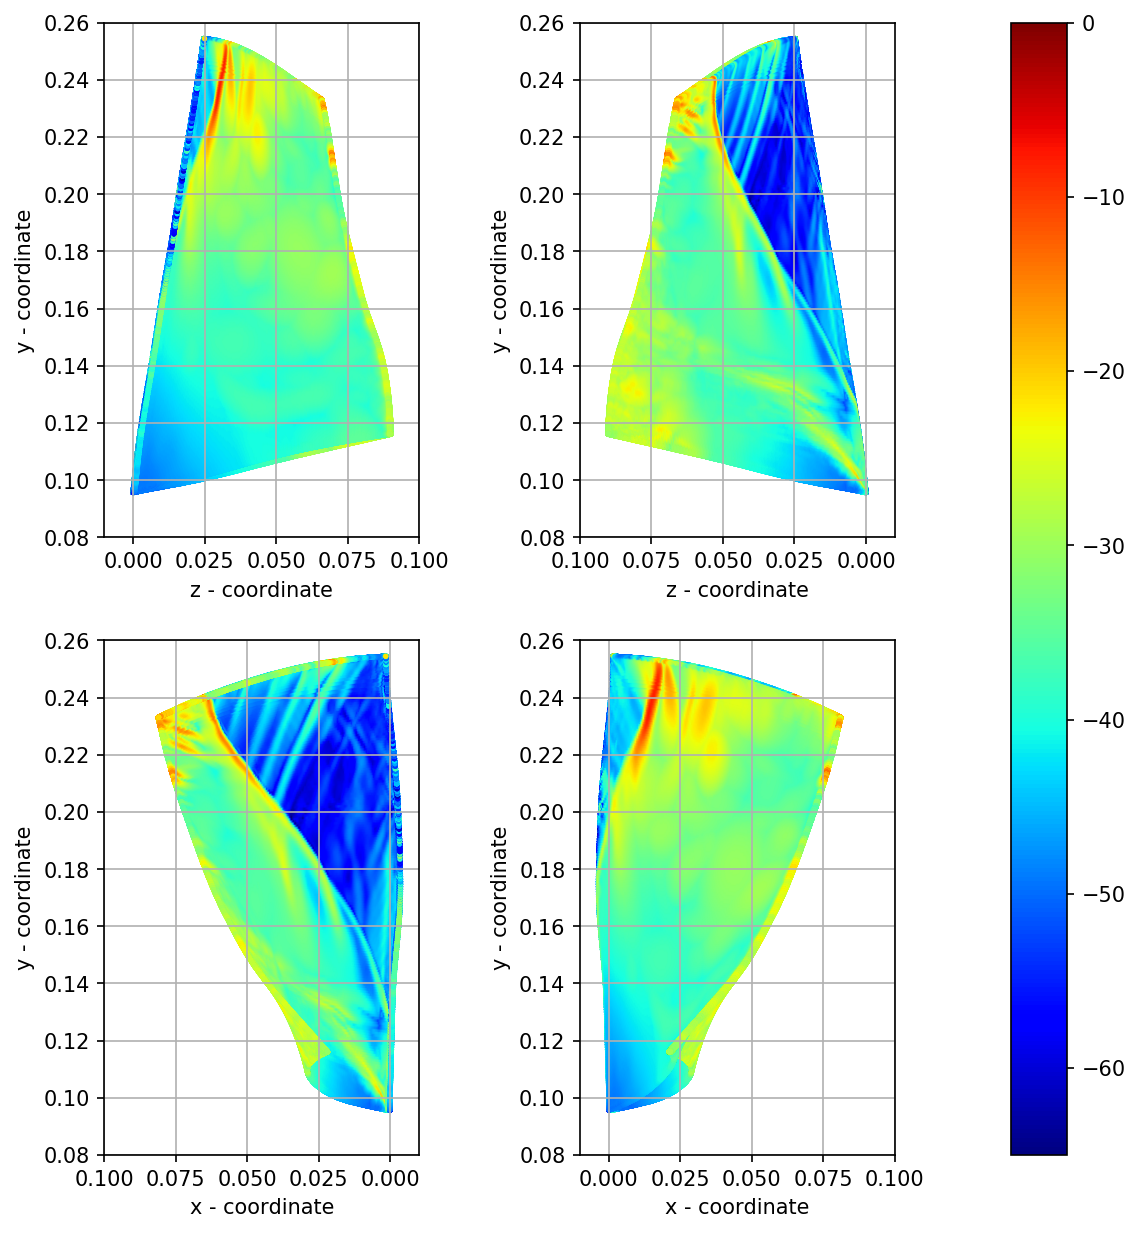

In [21]:
sound_pressure_plot, ax0 = plt.subplots(2, 2, figsize=(10, 10), dpi=150)
#sound_pressure_plot.suptitle('RMS amp_logdB at blade [dB]')

amp_log_plot = ax0[0][0].scatter(z_sside, y_sside, c=amp_log_sside, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[0][0].scatter(z_tip, y_tip, c=amp_log_tip, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[0][0].scatter(z_trail, y_trail, c=amp_log_trail, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[0][0].scatter(z_pside, y_pside, c=amp_log_pside, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[0][0].scatter(z_lead, y_lead, c=amp_log_lead, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[0][0].set_aspect('equal', 'box')
ax0[0][0].set_xlim(-0.01, 0.1)
ax0[0][0].set_ylim(0.08, 0.260)
ax0[0][0].set_xlabel('z - coordinate')
ax0[0][0].set_ylabel('y - coordinate')
ax0[0][0].grid()

ax0[0][1].scatter(z_lead, y_lead, c=amp_log_lead, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[0][1].scatter(z_pside, y_pside, c=amp_log_pside, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[0][1].scatter(z_trail, y_trail, c=amp_log_trail, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[0][1].scatter(z_tip, y_tip, c=amp_log_tip, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[0][1].scatter(z_sside, y_sside, c=amp_log_sside, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[0][1].set_aspect('equal', 'box')
ax0[0][1].set_xlim(-0.01, 0.1)
ax0[0][1].set_ylim(0.08, 0.260)
ax0[0][1].invert_xaxis()
ax0[0][1].set_xlabel('z - coordinate')
ax0[0][1].set_ylabel('y - coordinate')
ax0[0][1].grid()

ax0[1][0].scatter(x_trail, y_trail, c=amp_log_trail, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[1][0].scatter(x_pside, y_pside, c=amp_log_pside, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[1][0].scatter(x_sside, y_sside, c=amp_log_sside, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[1][0].scatter(x_tip, y_tip, c=amp_log_tip, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[1][0].scatter(x_lead, y_lead, c=amp_log_lead, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[1][0].set_aspect('equal', 'box')
ax0[1][0].set_xlim(-0.01, 0.1)
ax0[1][0].set_ylim(0.08, 0.260)
ax0[1][0].invert_xaxis()
ax0[1][0].set_xlabel('x - coordinate')
ax0[1][0].set_ylabel('y - coordinate')
ax0[1][0].grid()

ax0[1][1].scatter(x_lead, y_lead, c=amp_log_lead, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[1][1].scatter(x_tip, y_tip, c=amp_log_tip, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[1][1].scatter(x_sside, y_sside, c=amp_log_sside, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[1][1].scatter(x_pside, y_pside, c=amp_log_pside, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[1][1].scatter(x_trail, y_trail, c=amp_log_trail, s=2, cmap=plt.cm.jet, vmin=surf_min, vmax=0)
ax0[1][1].set_aspect('equal', 'box')
ax0[1][1].set_xlim(-0.01, 0.1)
ax0[1][1].set_ylim(0.08, 0.260)
ax0[1][1].set_xlabel('x - coordinate')
ax0[1][1].set_ylabel('y - coordinate')
ax0[1][1].grid()

sound_pressure_plot.colorbar(amp_log_plot, ax=ax0, orientation="vertical", pad=0.1)
#plt.show()

os.chdir(path_plots)
plt.savefig('blade-peak-mag.png', bbox_inches='tight')

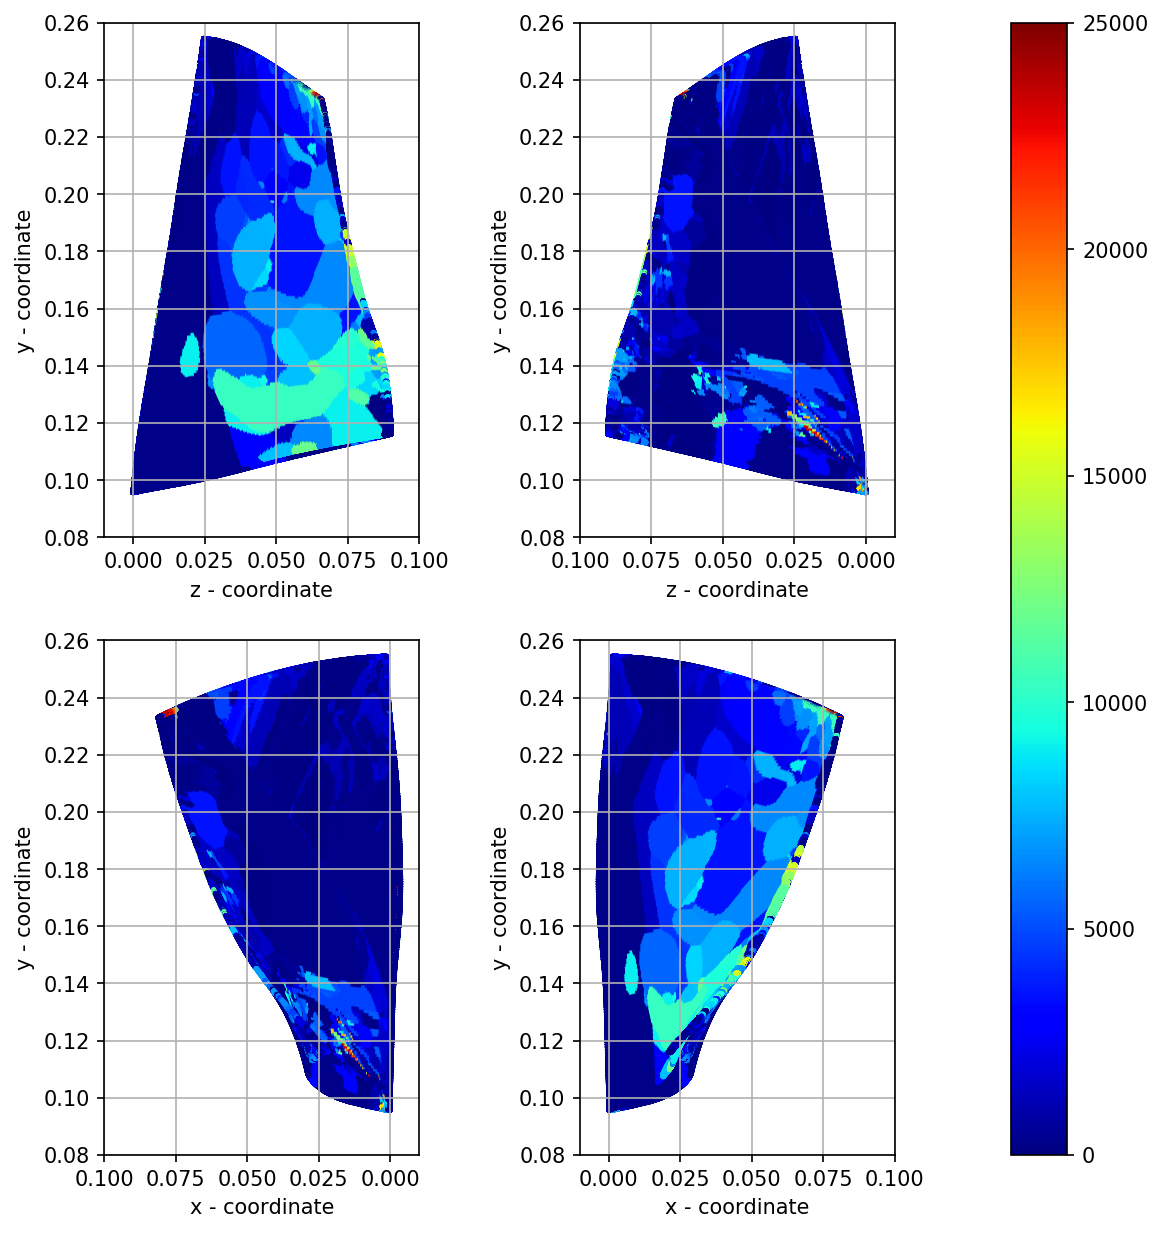

In [26]:
sound_pressure_plot, ax0 = plt.subplots(2, 2, figsize=(10, 10), dpi=150)
#sound_pressure_plot.suptitle('RMS freqdB at blade [dB]')

freq_plot = ax0[0][0].scatter(z_sside, y_sside, c=freq_sside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][0].scatter(z_tip, y_tip, c=freq_tip, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][0].scatter(z_trail, y_trail, c=freq_trail, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][0].scatter(z_pside, y_pside, c=freq_pside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][0].scatter(z_lead, y_lead, c=freq_lead, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][0].set_aspect('equal', 'box')
ax0[0][0].set_xlim(-0.01, 0.1)
ax0[0][0].set_ylim(0.08, 0.260)
ax0[0][0].set_xlabel('z - coordinate')
ax0[0][0].set_ylabel('y - coordinate')
ax0[0][0].grid()

ax0[0][1].scatter(z_lead, y_lead, c=freq_lead, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][1].scatter(z_pside, y_pside, c=freq_pside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][1].scatter(z_trail, y_trail, c=freq_trail, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][1].scatter(z_tip, y_tip, c=freq_tip, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][1].scatter(z_sside, y_sside, c=freq_sside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][1].set_aspect('equal', 'box')
ax0[0][1].set_xlim(-0.01, 0.1)
ax0[0][1].set_ylim(0.08, 0.260)
ax0[0][1].invert_xaxis()
ax0[0][1].set_xlabel('z - coordinate')
ax0[0][1].set_ylabel('y - coordinate')
ax0[0][1].grid()

ax0[1][0].scatter(x_trail, y_trail, c=freq_trail, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][0].scatter(x_pside, y_pside, c=freq_pside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][0].scatter(x_sside, y_sside, c=freq_sside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][0].scatter(x_tip, y_tip, c=freq_tip, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][0].scatter(x_lead, y_lead, c=freq_lead, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][0].set_aspect('equal', 'box')
ax0[1][0].set_xlim(-0.01, 0.1)
ax0[1][0].set_ylim(0.08, 0.260)
ax0[1][0].invert_xaxis()
ax0[1][0].set_xlabel('x - coordinate')
ax0[1][0].set_ylabel('y - coordinate')
ax0[1][0].grid()

ax0[1][1].scatter(x_lead, y_lead, c=freq_lead, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][1].scatter(x_tip, y_tip, c=freq_tip, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][1].scatter(x_sside, y_sside, c=freq_sside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][1].scatter(x_pside, y_pside, c=freq_pside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][1].scatter(x_trail, y_trail, c=freq_trail, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][1].set_aspect('equal', 'box')
ax0[1][1].set_xlim(-0.01, 0.1)
ax0[1][1].set_ylim(0.08, 0.260)
ax0[1][1].set_xlabel('x - coordinate')
ax0[1][1].set_ylabel('y - coordinate')
ax0[1][1].grid()

sound_pressure_plot.colorbar(freq_plot, ax=ax0, orientation="vertical", pad=0.1)
#plt.show()

os.chdir(path_plots)
plt.savefig('blade-peak-freq.png', bbox_inches='tight')

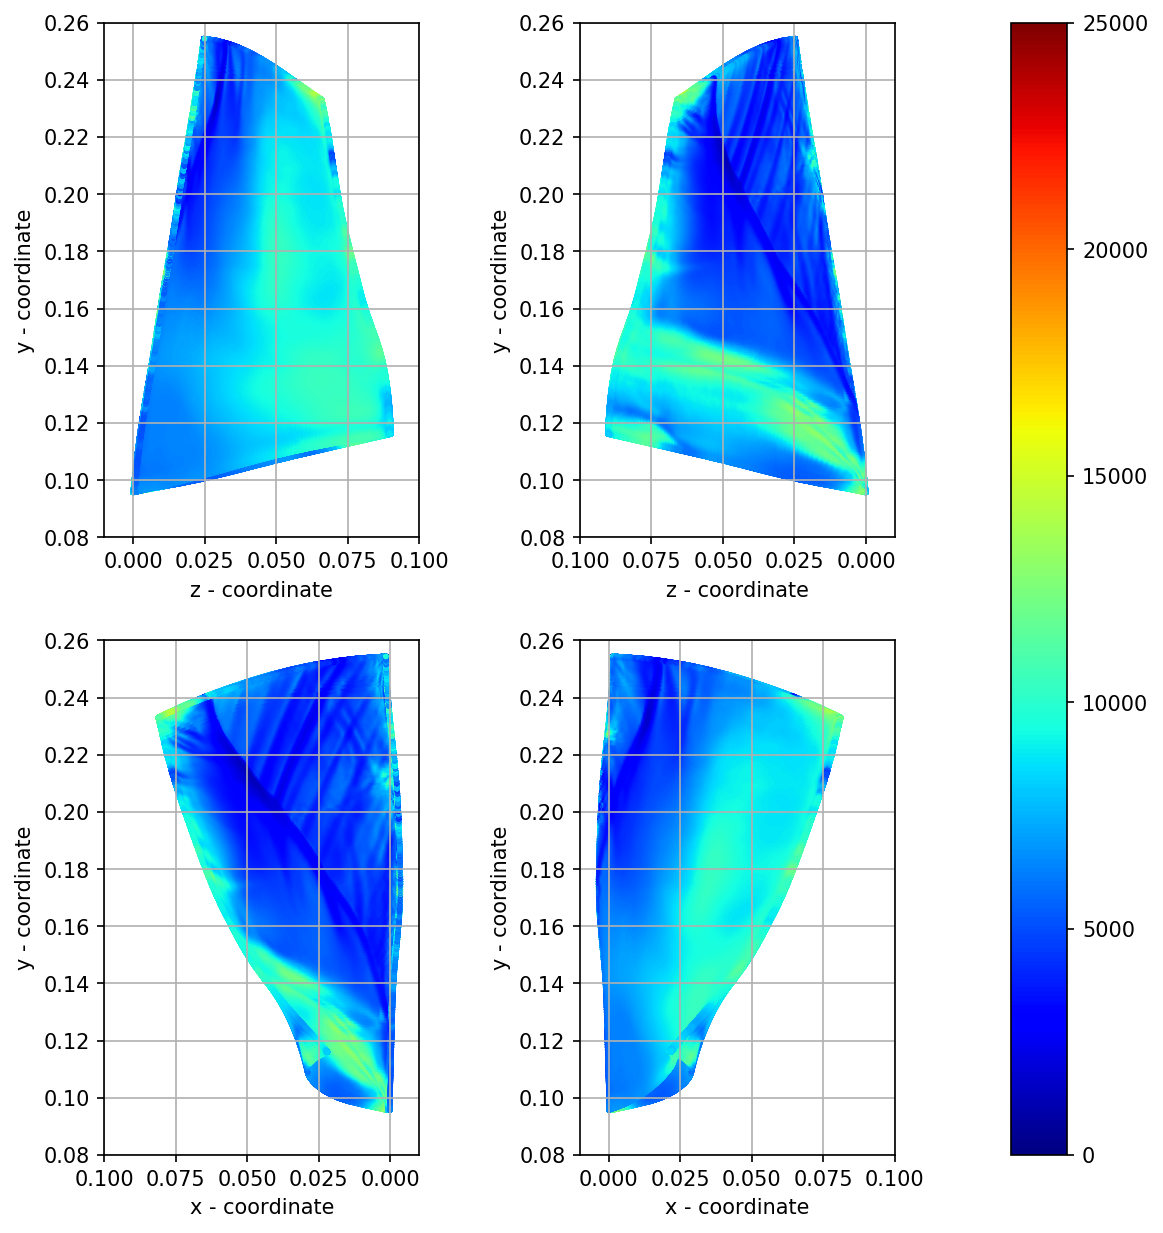

In [27]:
sound_pressure_plot, ax0 = plt.subplots(2, 2, figsize=(10, 10), dpi=150)
#sound_pressure_plot.suptitle('RMS awfdB at blade [dB]')

awf_plot = ax0[0][0].scatter(z_sside, y_sside, c=awf_sside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][0].scatter(z_tip, y_tip, c=awf_tip, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][0].scatter(z_trail, y_trail, c=awf_trail, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][0].scatter(z_pside, y_pside, c=awf_pside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][0].scatter(z_lead, y_lead, c=awf_lead, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][0].set_aspect('equal', 'box')
ax0[0][0].set_xlim(-0.01, 0.1)
ax0[0][0].set_ylim(0.08, 0.260)
ax0[0][0].set_xlabel('z - coordinate')
ax0[0][0].set_ylabel('y - coordinate')
ax0[0][0].grid()

ax0[0][1].scatter(z_lead, y_lead, c=awf_lead, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][1].scatter(z_pside, y_pside, c=awf_pside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][1].scatter(z_trail, y_trail, c=awf_trail, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][1].scatter(z_tip, y_tip, c=awf_tip, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][1].scatter(z_sside, y_sside, c=awf_sside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[0][1].set_aspect('equal', 'box')
ax0[0][1].set_xlim(-0.01, 0.1)
ax0[0][1].set_ylim(0.08, 0.260)
ax0[0][1].invert_xaxis()
ax0[0][1].set_xlabel('z - coordinate')
ax0[0][1].set_ylabel('y - coordinate')
ax0[0][1].grid()

ax0[1][0].scatter(x_trail, y_trail, c=awf_trail, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][0].scatter(x_pside, y_pside, c=awf_pside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][0].scatter(x_sside, y_sside, c=awf_sside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][0].scatter(x_tip, y_tip, c=awf_tip, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][0].scatter(x_lead, y_lead, c=awf_lead, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][0].set_aspect('equal', 'box')
ax0[1][0].set_xlim(-0.01, 0.1)
ax0[1][0].set_ylim(0.08, 0.260)
ax0[1][0].invert_xaxis()
ax0[1][0].set_xlabel('x - coordinate')
ax0[1][0].set_ylabel('y - coordinate')
ax0[1][0].grid()

ax0[1][1].scatter(x_lead, y_lead, c=awf_lead, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][1].scatter(x_tip, y_tip, c=awf_tip, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][1].scatter(x_sside, y_sside, c=awf_sside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][1].scatter(x_pside, y_pside, c=awf_pside, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][1].scatter(x_trail, y_trail, c=awf_trail, s=2, cmap=plt.cm.jet, vmin=0, vmax=25005)
ax0[1][1].set_aspect('equal', 'box')
ax0[1][1].set_xlim(-0.01, 0.1)
ax0[1][1].set_ylim(0.08, 0.260)
ax0[1][1].set_xlabel('x - coordinate')
ax0[1][1].set_ylabel('y - coordinate')
ax0[1][1].grid()

sound_pressure_plot.colorbar(awf_plot, ax=ax0, orientation="vertical", pad=0.1)
#plt.show()

os.chdir(path_plots)
plt.savefig('blade-awf.png', bbox_inches='tight')

In [49]:
os.chdir(path_mag)
magt = pd.read_csv('plt_mag_int-01-fft.csv').set_index('nodenumber')
freqt = magt.idxmax(axis=1)
ampt = magt.max(axis=1)
amp_logt = ampt.apply(lambda x: 20*np.log10(x/gmax))
awft = magt.apply(lambda x: np.sum(x*f_bin[:1254])/np.sum(x), axis=1) #amplitude weighted frequency
magt

,0.0,19.94,39.88,59.82,79.76,99.7,119.64,139.58,159.52,179.46,...,24805.58,24825.52,24845.46,24865.4,24885.34,24905.28,24925.22,24945.16,24965.1,24985.04
nodenumber,,,,,,,,,,,,,,,,,,,,,
1,0.012359,3.789141,4.036232,1.797327,3.090369,3.582687,4.779331,1.028889,1.777430,5.568313,...,0.059922,0.034598,0.026354,0.028506,0.032991,0.036238,0.060576,0.028633,0.020695,0.043517
2,0.012200,3.793313,4.030388,1.814890,3.096830,3.566061,4.779997,1.024179,1.795042,5.557131,...,0.051918,0.033215,0.030927,0.031924,0.020997,0.017595,0.039500,0.016013,0.018734,0.040110
3,0.011989,3.789954,4.029860,1.815023,3.097260,3.564589,4.780639,1.023205,1.796144,5.555898,...,0.052387,0.032919,0.031492,0.033747,0.023382,0.016616,0.040113,0.014119,0.019084,0.041340
4,0.011802,3.785879,4.028138,1.814407,3.098202,3.562683,4.780631,1.022341,1.797377,5.552794,...,0.051263,0.035980,0.033480,0.038386,0.027334,0.016347,0.040420,0.013773,0.020261,0.043668
5,0.011611,3.781934,4.026578,1.814295,3.098292,3.560619,4.779934,1.022377,1.798153,5.549938,...,0.047164,0.039844,0.034194,0.042542,0.029372,0.017569,0.038701,0.011855,0.022857,0.043333
6,0.011717,3.778166,4.024999,1.813307,3.098796,3.559111,4.778613,1.021540,1.798930,5.547415,...,0.044113,0.041107,0.034067,0.045810,0.030837,0.017336,0.035773,0.009588,0.026087,0.044427
7,0.011348,3.775533,4.022943,1.812435,3.099346,3.557746,4.777340,1.021026,1.799374,5.545975,...,0.038192,0.044074,0.034108,0.048538,0.031653,0.015436,0.032242,0.008579,0.026106,0.046151
8,0.011542,3.773276,4.021683,1.811483,3.099788,3.557164,4.775982,1.020551,1.799648,5.545717,...,0.031100,0.045367,0.032013,0.049128,0.029438,0.015301,0.026879,0.005684,0.025851,0.044578
9,0.011264,3.771993,4.020452,1.809921,3.099474,3.557379,4.773582,1.020114,1.799855,5.545452,...,0.027264,0.042721,0.028172,0.049049,0.027923,0.015313,0.021210,0.004020,0.024923,0.043606


In [52]:
magt.loc[31000]

0.0           0.066965
19.94       223.787676
39.88        39.518298
59.82       154.888053
79.76       122.380733
99.7        176.350941
119.64      137.534589
139.58       87.736405
159.52       42.936169
179.46      134.523032
199.4       216.966353
219.34      164.418401
239.28       80.695828
259.22       98.396192
279.16      139.461562
299.1       121.183158
319.04      149.398247
338.98      120.249869
358.92      103.413472
378.86      162.525139
398.8       149.804021
418.74       56.277672
438.68       91.534900
458.62      129.431385
478.56       62.871295
498.5        42.902431
518.44       58.895533
538.38       61.472017
558.33      114.419433
578.27       42.396903
               ...    
24406.78      7.125767
24426.72      8.290455
24446.66     12.048976
24466.6      15.040052
24486.54      3.828440
24506.48     10.130258
24526.42     12.309098
24546.36      5.601409
24566.3       6.086884
24586.24      4.330962
24606.18      2.107740
24626.12      6.210217
24646.06   

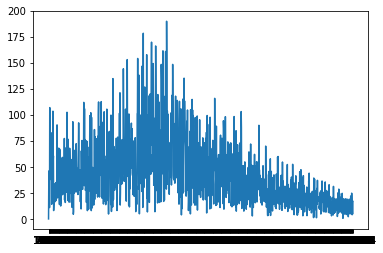

In [58]:
plt.plot(magt.loc[33750])
plt.show()

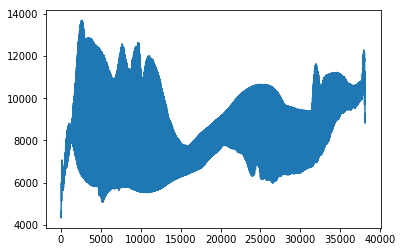

In [57]:
plt.plot(awft)
plt.show()